In [1]:
# token = 'cb25867a53d7
# 23d058c6d15d29d416
# fc981bfe92d68e1709
# ae61ae0157806312'
token = 'cb25867a53d723d058c6d15d29d416fc981bfe92d68e1709ae61ae0157806312'
token

'cb25867a53d723d058c6d15d29d416fc981bfe92d68e1709ae61ae0157806312'

In [2]:
# url para llamar a la API de E-SIOS
url = 'https://api.esios.ree.es/indicators'

In [9]:
# paquetes para importar
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1) Datos Mensuales

In [14]:
# mensual llamando a la api
start_date='01-01-2014T00:00:00 00:00'
end_date='31-12-2021T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators/1293/?start_date='+start_date+'&end_date='+end_date+'&time_trunc=month'
demanda_historico_mensual = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Host' : 'api.esios.ree.es',
        'Content-Type':'application/json',
        'Authorization':'Token token="%s"' % (token),
        'Cookie': ''
    }
)

demanda_historico_mensual.json()

{'Status': 403, 'message': 'Forbidden'}

In [18]:
# mensual llamando a la api
start_date='01-01-2014T00:00:00 00:00'
end_date='31-12-2021T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators?start_date='+start_date+'&end_date='+end_date+'&date_type=datos'
demanda_historico_mensual = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Content-Type': 'application/json',
        'x-api-key': token
    }
)

demanda_historico_mensual.json()

{'indicators': [{'name': 'Generación programada PBF Hidráulica UGH',
   'description': '<p>Es el programa de energía diario, con desglose horario, de las diferentes Unidades de Programación correspondientes a ventas y adquisiciones de energía en el sistema eléctrico peninsular español. En concreto este indicador se refiere a las unidades de programación con tipo de producción hidráulica UGH.</p><p>Este programa es establecido por el OS a partir de la casación del OM y de las nominaciones de programas de todas y cada una de las Unidades de Programación que le han sido comunicadas por los sujetos titulares de dichas Unidades de Programación, incluyendo las correspondientes a la ejecución de contratos bilaterales con entrega física de los cuales se ha confirmado la ejecución.</p><p><b>Publicación:</b> diariamente a partir de las 13:45 horas con la información del día D+1.</p>',
   'short_name': 'Hidráulica UGH',
   'id': 1},
  {'name': 'Generación programada PBF Hidráulica no UGH',
   'de

In [5]:
value=[]
date_record=[]
for demanda_value in demanda_historico_mensual.json()['indicator']['values']:
    value.append(demanda_value['value'])
    date_record.append(demanda_value['datetime'][:10])

In [6]:
demanda_dataframe_month = pd.DataFrame({
    'date':date_record, 
    'value':value   
})

In [7]:
demanda_dataframe_month.head()

,date,value
0,2014-01-01,132056990.0
1,2014-02-01,121688438.0
2,2014-03-01,124724746.0
3,2014-04-01,112057243.0
4,2014-05-01,116035410.0


In [8]:
demanda_dataframe_month.to_csv(r'demanda_electrica_month.csv', index=False)

In [9]:
demanda_dataframe_month = pd.read_csv('demanda_electrica_month.csv')
demanda_dataframe_month.head()

,date,value
0,2014-01-01,132056990.0
1,2014-02-01,121688438.0
2,2014-03-01,124724746.0
3,2014-04-01,112057243.0
4,2014-05-01,116035410.0


## 2) Datos Horarios

### Versión 1: datos horarios

In [10]:
# mensual llamando a la api
start_date='01-01-2014T00:00:00 00:00'
end_date='31-12-2021T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators/1293/?start_date='+start_date+'&end_date='+end_date+'&time_trunc=hour'
demanda_historico_horario = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Host' : 'api.esios.ree.es',
        'Content-Type':'application/json',
        'Authorization':'Token token="%s"' % (token),
        'Cookie': ''
    }
)

demanda_historico_horario.json()

{'indicator': {'name': 'Demanda real',
  'short_name': 'Demanda real',
  'id': 1293,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': False,
  'magnitud': [{'name': 'Potencia', 'id': 20}],
  'tiempo': [{'name': 'Diez minutos', 'id': 225}],
  'geos': [{'geo_id': 8741, 'geo_name': 'Península'}],
  'values_updated_at': '2021-12-31T23:09:00.000+01:00',
  'values': [{'value': 145810.0,
    'datetime': '2014-01-01T00:00:00.000+01:00',
    'datetime_utc': '2013-12-31T23:00:00Z',
    'tz_time': '2013-12-31T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 140192.0,
    'datetime': '2014-01-01T01:00:00.000+01:00',
    'datetime_utc': '2014-01-01T00:00:00Z',
    'tz_time': '2014-01-01T00:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 130035.0,
    'datetime': '2014-01-01T02:00:00.000+01:00',
    'datetime_utc': '2014-01-01T01:00:00Z',
    'tz_time': '2014-01-01T01:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Penínsu

In [11]:
value=[]
date_record=[]
hour=[]
for demanda_value in demanda_historico_horario.json()['indicator']['values']:
    value.append(demanda_value['value'])
    date_record.append(demanda_value['datetime'][:10])
    hour.append(demanda_value['datetime'][11:13])

In [12]:
demanda_dataframe_hour = pd.DataFrame({
    'date':date_record, 
    'hour': hour,
    'value':value   
})

In [13]:
demanda_dataframe_hour.head()

,date,hour,value
0,2014-01-01,00,145810.0
1,2014-01-01,01,140192.0
2,2014-01-01,02,130035.0
3,2014-01-01,03,121152.0
4,2014-01-01,04,115324.0


In [14]:
demanda_dataframe_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    70128 non-null  object 
 1   hour    70128 non-null  object 
 2   value   70128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [15]:
demanda_dataframe_hour.to_csv(r'demanda_electrica_hora.csv', index=False)

In [16]:
demanda_dataframe_hour = pd.read_csv('demanda_electrica_hora.csv')

In [17]:
demanda_dataframe_hour.head()

,date,hour,value
0,2014-01-01,0,145810.0
1,2014-01-01,1,140192.0
2,2014-01-01,2,130035.0
3,2014-01-01,3,121152.0
4,2014-01-01,4,115324.0


### Versión 2: con días de la semana y festivos

#### a) Día de la semana:

Vamos a añadir una nueva columna `weekday` en el que va a haber un valor según el día: Lunes=0, ..., Domingo=6.

In [18]:
demanda_hour_v2 = pd.read_csv('demanda_electrica_hora.csv')

In [19]:
demanda_hour_v2['weekday'] = pd.to_datetime(demanda_hour_v2['date']).apply(lambda x: x.weekday())

In [20]:
demanda_hour_v2.head()

,date,hour,value,weekday
0,2014-01-01,0,145810.0,2
1,2014-01-01,1,140192.0,2
2,2014-01-01,2,130035.0,2
3,2014-01-01,3,121152.0,2
4,2014-01-01,4,115324.0,2


#### b) Día laboral o festivo

In [21]:
demanda_hour_v2.weekday.unique()

array([2, 3, 4, 5, 6, 0, 1])

Comprobamos que los días de la semana van del 0 (lunes) al 6 (domingo).

Creamos una función para determinar si es sábado/domingo (0) o lunes-viernes (1):

In [22]:
# if weekday is 5 or 6 (Saturday or Sunday) is not working day, else working day:
def is_working_day(day):
    if day == 5 or day == 6:
        return 0
    else:
        return 1

In [23]:
demanda_hour_v2['working_day'] = demanda_hour_v2['weekday'].apply(is_working_day)

In [24]:
demanda_hour_v2.working_day.unique()

array([1, 0])

In [25]:
demanda_hour_v2.loc[demanda_hour_v2['date'] == '2014-08-15']

,date,hour,value,weekday,working_day
5423,2014-08-15,0,151159.0,4,1
5424,2014-08-15,1,141692.0,4,1
5425,2014-08-15,2,133955.0,4,1
5426,2014-08-15,3,129741.0,4,1
5427,2014-08-15,4,127019.0,4,1
5428,2014-08-15,5,125050.0,4,1
5429,2014-08-15,6,125591.0,4,1
5430,2014-08-15,7,124808.0,4,1
5431,2014-08-15,8,126699.0,4,1
5432,2014-08-15,9,135823.0,4,1


In [26]:
demanda_hour_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70128 non-null  object 
 1   hour         70128 non-null  int64  
 2   value        70128 non-null  float64
 3   weekday      70128 non-null  int64  
 4   working_day  70128 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ MB


In [27]:
demanda_hour_v2.head()

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,1
1,2014-01-01,1,140192.0,2,1
2,2014-01-01,2,130035.0,2,1
3,2014-01-01,3,121152.0,2,1
4,2014-01-01,4,115324.0,2,1


Buscamos los festivos de cada año entre 2014 y 2021 y los concatenamos después:

In [28]:
festives_spain_2014 = [
    '2014-01-01', '2014-01-06', '2014-04-17', '2014-04-18', '2014-05-01', 
    '2014-06-19', '2014-08-15', '2014-11-01', '2014-12-06', '2014-12-08', '2014-12-25'
]

In [29]:
festives_spain_2015 = [
    '2015-01-01', '2015-01-06', '2015-04-02', '2015-04-03',
    '2015-05-01', '2015-10-12', '2015-11-01', 
    '2015-12-06', '2015-12-08', '2015-12-25'
]

In [30]:
festives_spain_2016 = [
    '2016-01-01', '2016-01-06', '2016-03-24', '2016-03-25',
    '2016-05-01', '2016-08-15', '2016-10-12', 
    '2016-11-01', '2016-12-06', '2016-12-08',
    '2016-12-25'
]

In [31]:
festives_spain_2017 = [
    '2017-01-01', '2017-01-06', '2017-04-13', '2017-04-14', '2017-05-01',
    '2017-08-15', '2017-10-12', '2017-11-01', '2017-12-06',
    '2017-12-08', '2017-12-25'
]

In [32]:
festives_spain_2018 = [
    '2018-01-01', '2018-01-06', '2018-03-29', '2018-03-30', '2018-05-01',
    '2018-08-15', '2018-10-12', '2018-11-01', '2018-12-06',
    '2018-12-08', '2018-12-25'
]

In [33]:
festives_spain_2019 = [
    '2019-01-01', '2019-01-06', '2019-04-18', '2019-04-19',
    '2019-05-01', '2019-08-15', '2019-10-12', '2019-11-01',
    '2019-12-06', '2019-12-08', '2019-12-25'
]

In [34]:
festives_spain_2020 = [
    '2020-01-01', '2020-01-06', '2020-04-09', '2020-04-10',
    '2020-05-01', '2020-08-15', '2020-10-12', '2020-11-01',
    '2020-12-06', '2020-12-08', '2020-12-25'
]

In [35]:
festives_spain_2021 = [
    '2021-01-01', '2021-01-06', '2021-04-01', '2021-04-02',
    '2021-05-01', '2021-08-15', '2021-10-12', '2021-11-01',
    '2021-12-06', '2021-12-08', '2021-12-25'
]

In [36]:
festives_spain_2022 = [
    '2022-01-01', '2022-01-06', '2022-04-14', '2022-04-15',
    '2022-05-01', '2022-08-15', '2022-10-12', '2022-11-01',
    '2022-12-06', '2022-12-08', '2022-12-25'
]

In [37]:
festives_spain_2014_2021 = festives_spain_2014 + festives_spain_2015 + festives_spain_2016 + festives_spain_2017 + festives_spain_2018 + festives_spain_2019 + festives_spain_2020 + festives_spain_2021

In [38]:
festives_spain_2014_2022 = festives_spain_2014 + festives_spain_2015 + festives_spain_2016 + festives_spain_2017 + festives_spain_2018 + festives_spain_2019 + festives_spain_2020 + festives_spain_2021 + festives_spain_2022

In [39]:
def is_national_festive(date):
    if date in festives_spain_2014_2021:
        return 0
    else:
        return 1

In [40]:
demanda_hour_v2['working_day'] = demanda_hour_v2['date'].apply(is_national_festive)

Comprobamos que el día festivo que usamos como referencia, ahora figura como día festivo:

In [41]:
demanda_hour_v2.loc[demanda_hour_v2['date'] == '2014-08-15']

,date,hour,value,weekday,working_day
5423,2014-08-15,0,151159.0,4,0
5424,2014-08-15,1,141692.0,4,0
5425,2014-08-15,2,133955.0,4,0
5426,2014-08-15,3,129741.0,4,0
5427,2014-08-15,4,127019.0,4,0
5428,2014-08-15,5,125050.0,4,0
5429,2014-08-15,6,125591.0,4,0
5430,2014-08-15,7,124808.0,4,0
5431,2014-08-15,8,126699.0,4,0
5432,2014-08-15,9,135823.0,4,0


In [42]:
demanda_hour_v2.to_csv(r'demanda_electrica_hora_weekday.csv', index=False)

In [43]:
demanda_hour_v2 = pd.read_csv('demanda_electrica_hora_weekday.csv')

In [44]:
demanda_hour_v2.head()

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,0
1,2014-01-01,1,140192.0,2,0
2,2014-01-01,2,130035.0,2,0
3,2014-01-01,3,121152.0,2,0
4,2014-01-01,4,115324.0,2,0


In [45]:
# extraemos una semana

In [46]:
# demanda_hour_v2_test_week = demanda_hour_v2.loc[demanda_hour_v2['date'] == '2014-01-01']
demanda_hour_v2_test_week = demanda_hour_v2.loc[
    demanda_hour_v2['date'].isin([
        '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', 
        '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08'
    ])
]
demanda_hour_v2_test_week

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,0
1,2014-01-01,1,140192.0,2,0
2,2014-01-01,2,130035.0,2,0
3,2014-01-01,3,121152.0,2,0
4,2014-01-01,4,115324.0,2,0
...,...,...,...,...,...
187,2014-01-08,19,214267.0,2,1
188,2014-01-08,20,214905.0,2,1
189,2014-01-08,21,210905.0,2,1
190,2014-01-08,22,195654.0,2,1


In [47]:
demanda_hour_v2_test_week['date'] = pd.to_datetime(demanda_hour_v2_test_week.date) + pd.to_timedelta(demanda_hour_v2_test_week.hour, unit='h')
del demanda_hour_v2_test_week['hour']
demanda_hour_v2_test_week

/tmp/ipykernel_16140/3358090918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demanda_hour_v2_test_week['date'] = pd.to_datetime(demanda_hour_v2_test_week.date) + pd.to_timedelta(demanda_hour_v2_test_week.hour, unit='h')


,date,value,weekday,working_day
0,2014-01-01 00:00:00,145810.0,2,0
1,2014-01-01 01:00:00,140192.0,2,0
2,2014-01-01 02:00:00,130035.0,2,0
3,2014-01-01 03:00:00,121152.0,2,0
4,2014-01-01 04:00:00,115324.0,2,0
...,...,...,...,...
187,2014-01-08 19:00:00,214267.0,2,1
188,2014-01-08 20:00:00,214905.0,2,1
189,2014-01-08 21:00:00,210905.0,2,1
190,2014-01-08 22:00:00,195654.0,2,1


In [48]:
demanda_hour_v2_test_week.set_index("date", inplace=True)
demanda_hour_v2_test_week.head(2)

,value,weekday,working_day
date,,,
2014-01-01 00:00:00,145810.0,2,0
2014-01-01 01:00:00,140192.0,2,0


In [49]:
demanda_hour_v2_test_week = demanda_hour_v2_test_week.resample('H').first()

In [50]:
demanda_hour_v2_test_week.index.freq

<Hour>

In [51]:
demanda_hour_v2_test_week.index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-01-08 14:00:00', '2014-01-08 15:00:00',
               '2014-01-08 16:00:00', '2014-01-08 17:00:00',
               '2014-01-08 18:00:00', '2014-01-08 19:00:00',
               '2014-01-08 20:00:00', '2014-01-08 21:00:00',
               '2014-01-08 22:00:00', '2014-01-08 23:00:00'],
              dtype='datetime64[ns]', name='date', length=192, freq='H')

<AxesSubplot:xlabel='date'>

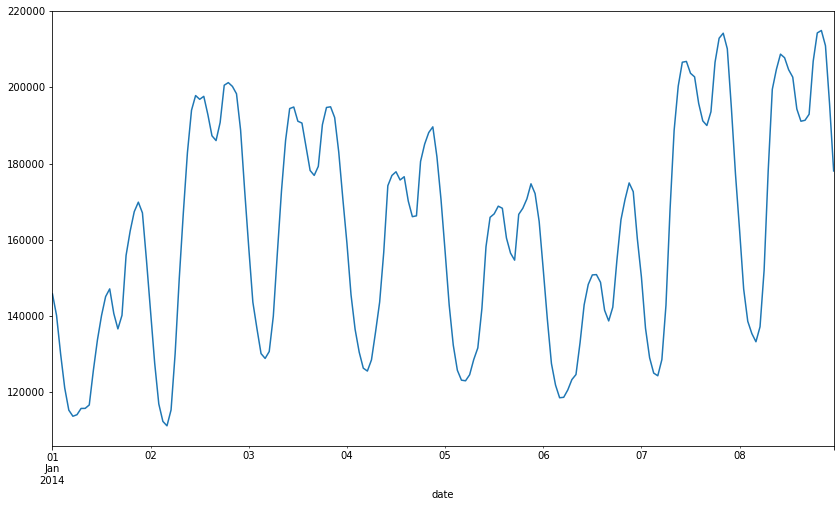

In [52]:
demanda_hour_v2_test_week['value'].plot(figsize=(14,8))

## 3) Datos Diarios (con días de la semana y festivos)

In [53]:
# mensual llamando a la api
start_date='01-01-2014T00:00:00 00:00'
end_date='31-12-2021T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators/1293/?start_date='+start_date+'&end_date='+end_date+'&time_trunc=day'
demanda_historico_diario = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Host' : 'api.esios.ree.es',
        'Content-Type':'application/json',
        'Authorization':'Token token="%s"' % (token),
        'Cookie': ''
    }
)

demanda_historico_diario.json()

{'indicator': {'name': 'Demanda real',
  'short_name': 'Demanda real',
  'id': 1293,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': False,
  'magnitud': [{'name': 'Potencia', 'id': 20}],
  'tiempo': [{'name': 'Diez minutos', 'id': 225}],
  'geos': [{'geo_id': 8741, 'geo_name': 'Península'}],
  'values_updated_at': '2021-12-31T23:09:00.000+01:00',
  'values': [{'value': 3315035.0,
    'datetime': '2014-01-01T00:00:00.000+01:00',
    'datetime_utc': '2013-12-31T23:00:00Z',
    'tz_time': '2013-12-31T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 4059590.0,
    'datetime': '2014-01-02T00:00:00.000+01:00',
    'datetime_utc': '2014-01-01T23:00:00Z',
    'tz_time': '2014-01-01T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 4098986.0,
    'datetime': '2014-01-03T00:00:00.000+01:00',
    'datetime_utc': '2014-01-02T23:00:00Z',
    'tz_time': '2014-01-02T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Pení

In [54]:
value=[]
date_record=[]
for demanda_value in demanda_historico_diario.json()['indicator']['values']:
    value.append(demanda_value['value'])
    date_record.append(demanda_value['datetime'][:10])

In [55]:
demanda_dataframe_day = pd.DataFrame({
    'date':date_record, 
    'value':value   
})

In [56]:
demanda_dataframe_day.head()

,date,value
0,2014-01-01,3315035.0
1,2014-01-02,4059590.0
2,2014-01-03,4098986.0
3,2014-01-04,3867911.0
4,2014-01-05,3648038.0


In [57]:
demanda_dataframe_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2922 non-null   object 
 1   value   2922 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.8+ KB


In [58]:
demanda_dataframe_day.to_csv(r'demanda_electrica_diaria.csv', index=False)

demanda_dataframe_day = pd.read_csv('demanda_electrica_diaria.csv')

demanda_dataframe_day.head()

,date,value
0,2014-01-01,3315035.0
1,2014-01-02,4059590.0
2,2014-01-03,4098986.0
3,2014-01-04,3867911.0
4,2014-01-05,3648038.0


In [59]:
demanda_dataframe_day['weekday'] = pd.to_datetime(demanda_dataframe_day['date']).apply(lambda x: x.weekday())

In [60]:
demanda_dataframe_day['working_day'] = demanda_dataframe_day['weekday'].apply(is_working_day)

In [61]:
demanda_dataframe_day['working_day'] = demanda_dataframe_day['date'].apply(is_national_festive)

In [62]:
# demanda_dataframe_day.to_csv(r'demanda_electrica_diaria.csv', index=False)

demanda_dataframe_day = pd.read_csv('demanda_electrica_diaria.csv')

demanda_dataframe_day

,date,value
0,2014-01-01,3315035.0
1,2014-01-02,4059590.0
2,2014-01-03,4098986.0
3,2014-01-04,3867911.0
4,2014-01-05,3648038.0
...,...,...
2917,2021-12-27,3686647.0
2918,2021-12-28,3729169.0
2919,2021-12-29,3692921.0
2920,2021-12-30,3689439.0


In [63]:
demanda_dataframe_day.set_index("date", inplace=True)
demanda_dataframe_day.head(2)

,value
date,
2014-01-01,3315035.0
2014-01-02,4059590.0


In [64]:
# demanda_dataframe_day = demanda_dataframe_day.resample('D').first()

In [65]:
demanda_dataframe_day.index

Index(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
       '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
       ...
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='date', length=2922)

In [66]:
# demanda_dataframe_day.index.freq
demanda_dataframe_day.index.freq = 'D'

In [67]:
demanda_dataframe_day.index.freq

'D'

In [68]:
demanda_dataframe_day.head()

,value
date,
2014-01-01,3315035.0
2014-01-02,4059590.0
2014-01-03,4098986.0
2014-01-04,3867911.0
2014-01-05,3648038.0


## 4) Días de la semana, Festivos y Temperatura

### a) Distribución Horaria

In [69]:
# data_temp = pd.read_csv('data_prices_temp.csv')
data_temp = pd.read_csv('demanda_hour_temp_resume.csv')
data_temp

FileNotFoundError: [Errno 2] No such file or directory: 'demanda_hour_temp_resume.csv'

In [ ]:
# cambiar las fechas de formato: '/' por '-'
data_temp['date'] = data_temp.date.apply(lambda x: x.replace('/', '-'))

In [ ]:
# eliminar 'value', 'weekday' y 'working_day'
# del data_temp['value']
# del data_temp['weekday']
# del data_temp['working_day']

In [ ]:
# eliminar año 2022
data_temp = data_temp[~data_temp.date.str.contains("2022")]

In [ ]:
data_temp.to_csv(r'data_temp_hourly.csv', index=False)

In [ ]:
demanda_hour_v2 = pd.read_csv('demanda_electrica_hora_weekday.csv')
demanda_hour_v2

# mergeamos por 'date' y 'hour'
demanda_hour_temp_resume = pd.merge(data_temp, demanda_hour_v2, how='inner', on=['date', 'hour'])
demanda_hour_temp_resume.to_csv(r'demanda_hour_temp_resume.csv', index=False)

demanda_hour_temp_resume = pd.read_csv('demanda_hour_temp_resume.csv')
demanda_hour_temp_resume

### b) Distribución Diaria

In [ ]:
demanda_hour_temp_resume = pd.read_csv('demanda_hour_temp_resume.csv')

# cambiar las fechas de formato: '/' por '-'
demanda_hour_temp_resume['date'] = demanda_hour_temp_resume.date.apply(lambda x: x.replace('/', '-'))

demanda_hour_temp_resume['weekday'] = pd.to_datetime(demanda_hour_temp_resume['date']).apply(lambda x: x.weekday())
demanda_hour_temp_resume['working_day'] = demanda_hour_temp_resume['weekday'].apply(is_working_day)
demanda_hour_temp_resume['working_day'] = demanda_hour_temp_resume['date'].apply(is_national_festive)


# eliminar año 2022
demanda_hour_temp_resume = demanda_hour_temp_resume[~demanda_hour_temp_resume.date.str.contains("2022")]

demanda_day_temp_resume = demanda_hour_temp_resume.groupby(['date']).mean()

del demanda_day_temp_resume['hour']
#del demanda_day_temp_resume['value']

demanda_day_temp_resume

In [ ]:
demanda_dataframe_day = pd.read_csv('demanda_electrica_diaria.csv')

demanda_dataframe_day

In [ ]:
demanda_day_temp_resume_total = pd.merge(
    demanda_day_temp_resume, 
    demanda_dataframe_day, 
    how='inner', 
    on=['date', 'weekday', 'working_day'])

demanda_day_temp_resume_total.info()

In [ ]:
cols = ['date', 'value',
        'weekday', 'working_day', 
        'madrid_temp', 
        'barcelona_temp', 'bilbao_temp', 'sevilla_temp', 'valencia_temp']

demanda_day_temp_resume_total = demanda_day_temp_resume_total[cols]

In [ ]:
demanda_day_temp_resume_total.to_csv(r'demanda_day_temp_resume_total.csv', index=False)

demanda_day_temp_resume_total = pd.read_csv('demanda_day_temp_resume_total.csv')
demanda_day_temp_resume_total

## 5) Días de la semana, Festivos, Temperatura y Estacionalidad (verano/invierno)

### a) Distribución Horaria

In [ ]:
demanda_hour_temp_resume = pd.read_csv('demanda_hour_temp_resume.csv')
demanda_hour_temp_resume

In [ ]:
# invierno:
## 21 de diciembre - 20 de marzo (YYYY-12-21 / YYYY-03-20)

# verano:
## 21 de junio - 23 de septiembre (YYYY-06-21 / YYYY-09-23)

In [ ]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

dataframe_resume = pd.DataFrame()
for year in years:
    demanda_hour_temp_resume = pd.read_csv('demanda_hour_temp_resume.csv')
    demanda_hour_temp_resume['year'] = pd.DatetimeIndex(demanda_hour_temp_resume['date']).year

    demanda_hour_temp_resume_year = demanda_hour_temp_resume[demanda_hour_temp_resume['year'] == int(year)]
    demanda_hour_temp_resume_year['date'] = demanda_hour_temp_resume_year['date'].apply(
        pd.to_datetime, format='%Y-%m-%d'
    )
        
    if year == '2021':
        winter_start = '2021'
        winter_end = '2022'
    else:
        winter_start = str(int(year)-1)
        winter_end = year
    
    in_between_winter = demanda_hour_temp_resume_year.date.between(winter_start+'-12-21', winter_end+'-03-20')
    demanda_hour_temp_resume_year['is_winter'] = np.where(in_between_winter, 1, 0)
    
    in_between_summer = demanda_hour_temp_resume_year.date.between(year+'-06-21', year+'-09-23')
    demanda_hour_temp_resume_year['is_summer'] = np.where(in_between_summer, 1, 0)
    
    dataframe_resume = dataframe_resume.append(demanda_hour_temp_resume_year, ignore_index=True)
    
del dataframe_resume['year']

In [ ]:
dataframe_resume

In [ ]:
dataframe_resume.to_csv(r'demanda_hour_temp_seasonal_resume.csv', index=False)

demanda_hour_temp_seasonal_resume = pd.read_csv('demanda_hour_temp_seasonal_resume.csv')
demanda_hour_temp_seasonal_resume

### b) Distribución Diaria

In [ ]:
demanda_day_temp_resume_total = pd.read_csv('demanda_day_temp_resume_total.csv')
demanda_day_temp_resume_total

In [ ]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

dataframe_resume_day = pd.DataFrame()
for year in years:
    demanda_day_temp_resume = pd.read_csv('demanda_day_temp_resume_total.csv')
    demanda_day_temp_resume['year'] = pd.DatetimeIndex(demanda_day_temp_resume['date']).year

    demanda_day_temp_resume_year = demanda_day_temp_resume[demanda_day_temp_resume['year'] == int(year)]
    demanda_day_temp_resume_year['date'] = demanda_day_temp_resume_year['date'].apply(
        pd.to_datetime, format='%Y-%m-%d'
    )
        
    if year == '2021':
        winter_start = '2021'
        winter_end = '2022'
    else:
        winter_start = str(int(year)-1)
        winter_end = year
    
    in_between_winter = demanda_day_temp_resume_year.date.between(winter_start+'-12-21', winter_end+'-03-20')
    demanda_day_temp_resume_year['is_winter'] = np.where(in_between_winter, 1, 0)
    
    in_between_summer = demanda_day_temp_resume_year.date.between(year+'-06-21', year+'-09-23')
    demanda_day_temp_resume_year['is_summer'] = np.where(in_between_summer, 1, 0)
    
    dataframe_resume_day = dataframe_resume_day.append(demanda_day_temp_resume_year, ignore_index=True)
    
del dataframe_resume_day['year']

In [ ]:
dataframe_resume_day

In [ ]:
dataframe_resume_day.to_csv(r'demanda_day_temp_seasonal_resume.csv', index=False)

demanda_day_temp_seasonal_resume = pd.read_csv('demanda_day_temp_seasonal_resume.csv')
demanda_day_temp_seasonal_resume

## 6) Días de la semana, Festivos, Temperatura y Estacionalidad (01/01/2014 - 28/02/2022)

In [ ]:
# mensual llamando a la api
start_date='01-01-2014T00:00:00 00:00'
end_date='28-02-2022T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators/1293/?start_date='+start_date+'&end_date='+end_date+'&time_trunc=day'
demanda_historico_diario_2014_2022 = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Host' : 'api.esios.ree.es',
        'Content-Type':'application/json',
        'Authorization':'Token token="%s"' % (token),
        'Cookie': ''
    }
)

demanda_historico_diario_2014_2022.json()

In [ ]:
value=[]
date_record=[]
for demanda_value in demanda_historico_diario_2014_2022.json()['indicator']['values']:
    value.append(demanda_value['value'])
    date_record.append(demanda_value['datetime'][:10])

In [ ]:
demanda_dataframe_day_2014_2022 = pd.DataFrame({
    'date':date_record, 
    'value':value   
})

demanda_dataframe_day_2014_2022.head()

In [ ]:
demanda_dataframe_day_2014_2022['weekday'] = pd.to_datetime(demanda_dataframe_day_2014_2022['date']).apply(lambda x: x.weekday())
demanda_dataframe_day_2014_2022['working_day'] = demanda_dataframe_day_2014_2022['weekday'].apply(is_working_day)
demanda_dataframe_day_2014_2022['working_day'] = demanda_dataframe_day_2014_2022['date'].apply(is_national_festive)

In [ ]:
demanda_dataframe_day_2014_2022

In [ ]:
# datos de temperatura hasta las que tenemos ---> ok
hourly_temp_df = pd.read_csv('data_temp_hourly_2014_2022.csv')
hourly_temp_df.groupby(['date']).mean()

del hourly_temp_df['hour']

hourly_temp_df['date'] = hourly_temp_df.date.apply(lambda x: x.replace('/', '-'))

In [ ]:
hourly_temp_df

In [ ]:
# mergeamos
# mergeamos por 'date'
demanda_diaria_resume_2014_2022 = pd.merge(demanda_dataframe_day_2014_2022, hourly_temp_df, how='inner', on=['date'])
demanda_diaria_resume_2014_2022.info()

In [ ]:
demanda_diaria_resume_2014_2022

In [ ]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

dataframe_resume = pd.DataFrame()
for year in years:
    # demanda_hour_temp_resume = pd.read_csv('demanda_hour_temp_resume.csv')
    demanda_hour_temp_resume = demanda_diaria_resume_2014_2022
    demanda_hour_temp_resume['year'] = pd.DatetimeIndex(demanda_hour_temp_resume['date']).year

    demanda_hour_temp_resume_year = demanda_hour_temp_resume[demanda_hour_temp_resume['year'] == int(year)]
    demanda_hour_temp_resume_year['date'] = demanda_hour_temp_resume_year['date'].apply(
        pd.to_datetime, format='%Y-%m-%d'
    )
        
    if year == '2022':
        winter_start = '2021'
        winter_end = '2022'
    else:
        winter_start = str(int(year)-1)
        winter_end = year
    
    in_between_winter = demanda_hour_temp_resume_year.date.between(winter_start+'-12-21', winter_end+'-03-20')
    demanda_hour_temp_resume_year['is_winter'] = np.where(in_between_winter, 1, 0)
    
    in_between_summer = demanda_hour_temp_resume_year.date.between(year+'-06-21', year+'-09-23')
    demanda_hour_temp_resume_year['is_summer'] = np.where(in_between_summer, 1, 0)
    
    dataframe_resume = dataframe_resume.append(demanda_hour_temp_resume_year, ignore_index=True)
    
del dataframe_resume['year']

In [ ]:
demanda_diaria_resume_2014_2022 = dataframe_resume
demanda_diaria_resume_2014_2022

In [ ]:
demanda_diaria_resume_2014_2022.to_csv(r'demanda_diaria_resume_2014_2022.csv', index=False)

## 8) Datos diarios (01/03/2022 - 31/03/2022)

In [ ]:
# mensual llamando a la api
start_date='01-03-2022T00:00:00 00:00'
end_date='31-03-2022T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators/1293/?start_date='+start_date+'&end_date='+end_date+'&time_trunc=day'
demanda_historico_marzo_2022 = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Host' : 'api.esios.ree.es',
        'Content-Type':'application/json',
        'Authorization':'Token token="%s"' % (token),
        'Cookie': ''
    }
)

demanda_historico_marzo_2022.json()

In [ ]:
value=[]
date_record=[]
for demanda_value in demanda_historico_marzo_2022.json()['indicator']['values']:
    value.append(demanda_value['value'])
    date_record.append(demanda_value['datetime'][:10])

In [ ]:
demanda_dataframe_marzo_2022 = pd.DataFrame({
    'date':date_record, 
    'value':value   
})

demanda_dataframe_marzo_2022

In [ ]:
demanda_dataframe_marzo_2022['weekday'] = pd.to_datetime(demanda_dataframe_marzo_2022['date']).apply(lambda x: x.weekday())
demanda_dataframe_marzo_2022['working_day'] = demanda_dataframe_marzo_2022['weekday'].apply(is_working_day)
demanda_dataframe_marzo_2022['working_day'] = demanda_dataframe_marzo_2022['date'].apply(is_national_festive)

In [ ]:
years = ['2022']

dataframe_resume = pd.DataFrame()
for year in years:
    # demanda_hour_temp_resume = pd.read_csv('demanda_hour_temp_resume.csv')
    demanda_hour_temp_resume = demanda_dataframe_marzo_2022
    demanda_hour_temp_resume['year'] = pd.DatetimeIndex(demanda_hour_temp_resume['date']).year

    demanda_hour_temp_resume_year = demanda_hour_temp_resume[demanda_hour_temp_resume['year'] == int(year)]
    demanda_hour_temp_resume_year['date'] = demanda_hour_temp_resume_year['date'].apply(
        pd.to_datetime, format='%Y-%m-%d'
    )
        
    if year == '2022':
        winter_start = '2021'
        winter_end = '2022'
    else:
        winter_start = str(int(year)-1)
        winter_end = year
    
    in_between_winter = demanda_hour_temp_resume_year.date.between(winter_start+'-12-21', winter_end+'-03-20')
    demanda_hour_temp_resume_year['is_winter'] = np.where(in_between_winter, 1, 0)
    
    in_between_summer = demanda_hour_temp_resume_year.date.between(year+'-06-21', year+'-09-23')
    demanda_hour_temp_resume_year['is_summer'] = np.where(in_between_summer, 1, 0)
    
    dataframe_resume = dataframe_resume.append(demanda_hour_temp_resume_year, ignore_index=True)
    
del dataframe_resume['year']

In [ ]:
demanda_dataframe_marzo_2022 = dataframe_resume

In [ ]:
demanda_dataframe_marzo_2022

In [ ]:
demanda_dataframe_marzo_2022.to_csv(r'demanda_dataframe_marzo_2022.csv', index=False)